### 대학가 원룸 가격, 이대로 괜찮은가?
기숙사 수용능력이 서울 대학가 원룸 가격에 미치는 영향: 
회귀분석을 통한 연구

### 1. 데이터 EDA

In [1]:
import pandas as pd

# Excel 파일 읽어들이기
data = pd.read_excel('C:/Users/hyeseung/Desktop/4-2/경제자료분석/최종데이터/univ_one_room_yonsei_apart_final.xlsx')

# 데이터 출력
data.head()

,univ_name,item_id,유형,보증금,월세,구_동,주소,관리비,층수,건물_층수,...,미사용토지_면적_weighted_mean,전체_교육용토지_면적_weighted_mean,지방_학생_신입생_비율_weighted_mean,대학교_학령인구_남자,대학교_학령인구_여자,지역학사_개수,행복기숙사_연합_개수,기숙사형청년주택,transaction_real_price_mean,transaction_real_price_median
0,"숭실대학교,중앙대학교",37269631,월세,100,23,관악구 봉천동,서울시 관악구 봉천동,10.0,1,4,...,57174.688737,3.263525e+05,0.693461,7798,8465,1,0,0,38387.949703,38500.0
1,"숭실대학교,중앙대학교",37269635,월세,100,23,관악구 봉천동,서울시 관악구 봉천동,10.0,1,4,...,56953.611460,3.261672e+05,0.693376,7798,8465,1,0,0,38387.949703,38500.0
2,"숭실대학교,중앙대학교",37986523,월세,100,15,관악구 봉천동,서울시 관악구 봉천동,10.0,1,4,...,57619.694719,3.267257e+05,0.693634,7798,8465,1,0,0,38387.949703,38500.0
3,서울대학교,38175770,월세,2000,35,관악구 봉천동,서울시 관악구 봉천동,10.0,4,7,...,0.000000,5.682322e+06,0.629165,7798,8465,1,0,0,38387.949703,38500.0
4,서울대학교,38227769,월세,100,30,관악구 봉천동,서울시 관악구 봉천동,0.0,2,3,...,0.000000,5.682322e+06,0.629165,7798,8465,1,0,0,38387.949703,38500.0


In [2]:
# Creating the new variable 'Converted Lease Fee'
data['월세변환'] = (data['보증금'] / 12 * 0.055) + data['월세'] + data['관리비']

# Display the first few rows to confirm the addition of the new variable
data[['보증금', '월세', '관리비', '월세변환']].head()

,보증금,월세,관리비,월세변환
0,100,23,10.0,33.458333
1,100,23,10.0,33.458333
2,100,15,10.0,25.458333
3,2000,35,10.0,54.166667
4,100,30,0.0,30.458333


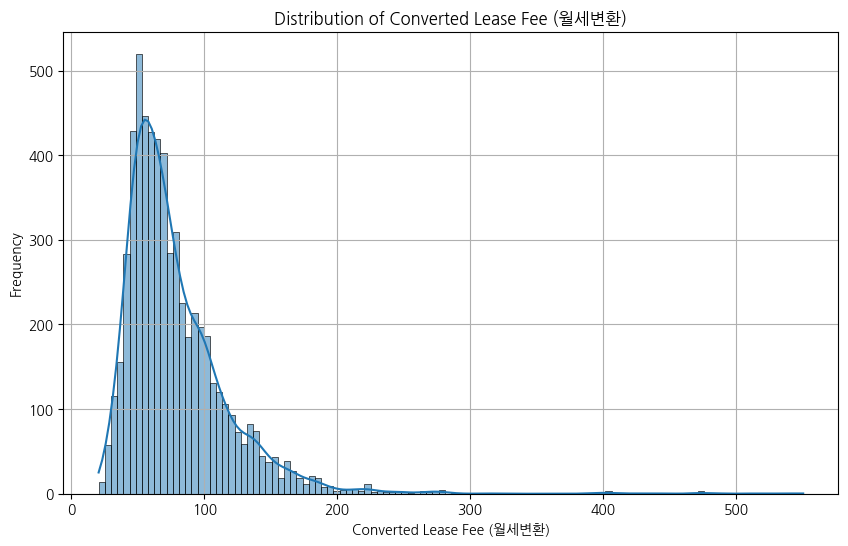

count    5977.000000
mean       78.687470
std        40.364340
min        20.458333
25%        52.291667
50%        68.583333
75%        94.583333
max       550.833333
Name: 월세변환, dtype: float64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

descriptive_stats = data['월세변환'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(data['월세변환'], kde=True)
plt.title('Distribution of Converted Lease Fee (월세변환)')
plt.xlabel('Converted Lease Fee (월세변환)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

descriptive_stats

로그?변환하면 좋을듯.

In [4]:
correlation_matrix = data.corr()
correlations_with_converted_rent = correlation_matrix['월세변환'].sort_values(ascending=False)
correlations_with_converted_rent.head(10) 

C:\Users\hyeseung\AppData\Local\Temp\ipykernel_14864\3858470530.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


월세변환                             1.000000
월세                               0.915822
전용면적                             0.684575
건물_층수                            0.524267
관리비                              0.476501
엘리베이터                            0.453206
transaction_real_price_median    0.391044
transaction_real_price_mean      0.380121
보증금                              0.223993
대형마트                             0.202206
Name: 월세변환, dtype: float64

In [5]:
# 기초 통계량 계산
basic_statistics = data.describe()

# 결측치 확인
missing_values = data.isnull().sum()

basic_statistics, missing_values.head(20)  # 처음 20개 변수에 대한 결측치만 표시함

(            item_id           보증금           월세          관리비        건물_층수  \
 count  5.977000e+03   5977.000000  5977.000000  5977.000000  5977.000000   
 mean   3.851172e+07   2060.593776    61.433328     7.809754     8.326753   
 std    1.362828e+05   3234.732255    37.478650     5.707615     7.363129   
 min    3.681307e+07      0.000000     1.000000     0.000000     1.000000   
 25%    3.846845e+07    500.000000    40.000000     5.000000     4.000000   
 50%    3.855596e+07   1000.000000    50.000000     7.500000     5.000000   
 75%    3.860101e+07   2000.000000    75.000000    10.000000    11.000000   
 max    3.862625e+07  30000.000000   480.000000   300.000000    49.000000   
 
               전용면적           pnu          냉장고          세탁기         옵션_수  ...  \
 count  5977.000000  5.977000e+03  5977.000000  5977.000000  5977.000000  ...   
 mean     28.348734  1.140999e+18     0.958340     0.952317     7.569516  ...   
 std      15.344592  1.816565e+16     0.199827     0.213112   

C:\Users\hyeseung\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\hyeseung\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


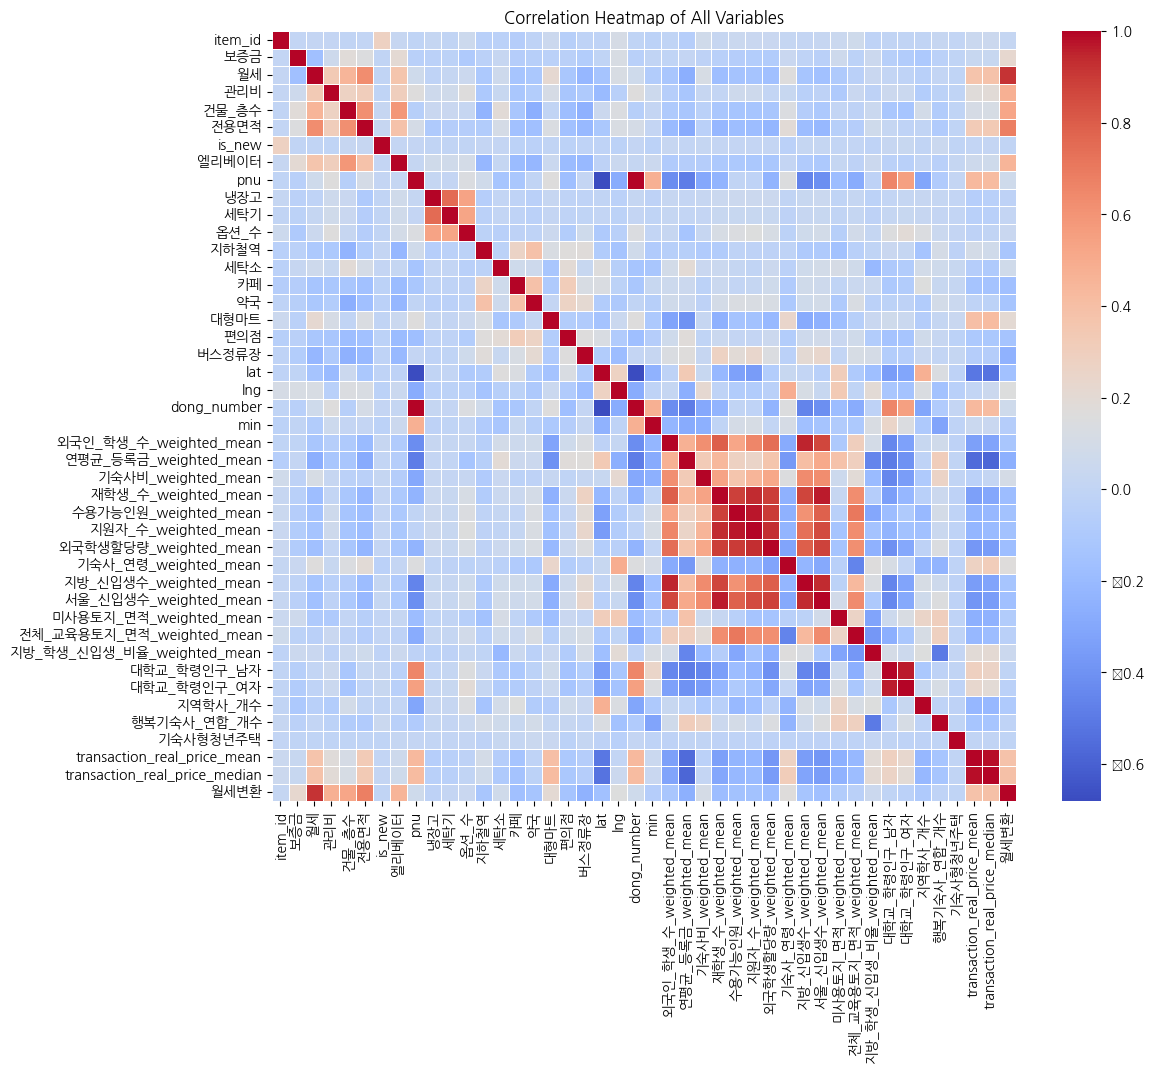

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap of All Variables')
plt.show()

In [7]:
correlations_with_converted_rent

월세변환                             1.000000
월세                               0.915822
전용면적                             0.684575
건물_층수                            0.524267
관리비                              0.476501
엘리베이터                            0.453206
transaction_real_price_median    0.391044
transaction_real_price_mean      0.380121
보증금                              0.223993
대형마트                             0.202206
기숙사_연령_weighted_mean             0.166649
lng                              0.155230
기숙사비_weighted_mean               0.102326
세탁소                              0.074227
dong_number                      0.071595
pnu                              0.071595
지방_학생_신입생_비율_weighted_mean       0.050996
옵션_수                             0.035009
item_id                          0.016102
세탁기                              0.014487
is_new                          -0.003435
대학교_학령인구_남자                     -0.008698
기숙사형청년주택                        -0.010926
행복기숙사_연합_개수                     -0

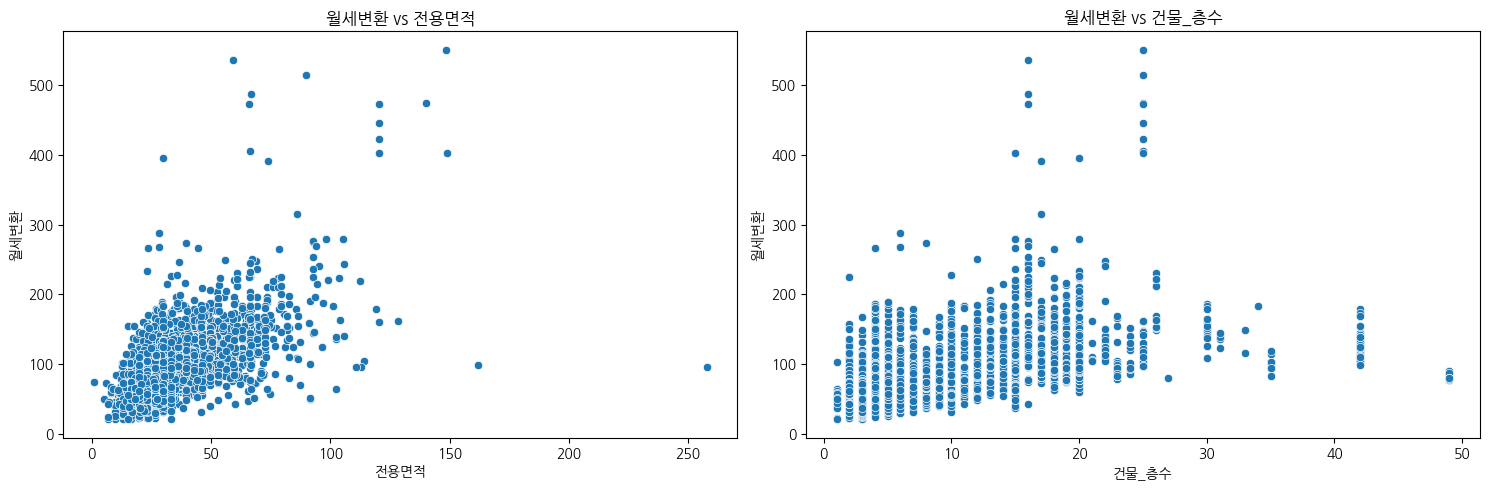

In [8]:
# Creating scatter plots for '월세변환' with highly correlated variables
# Selecting a few key variables for visualization
variables_for_visualization = [ '전용면적', '건물_층수']

plt.figure(figsize=(15, 5))
for i, variable in enumerate(variables_for_visualization):
    plt.subplot(1, len(variables_for_visualization), i + 1)
    sns.scatterplot(data=data, x=variable, y='월세변환')
    plt.title(f'월세변환 vs {variable}')
    plt.xlabel(variable)
    plt.ylabel('월세변환')
    plt.tight_layout()

plt.show()

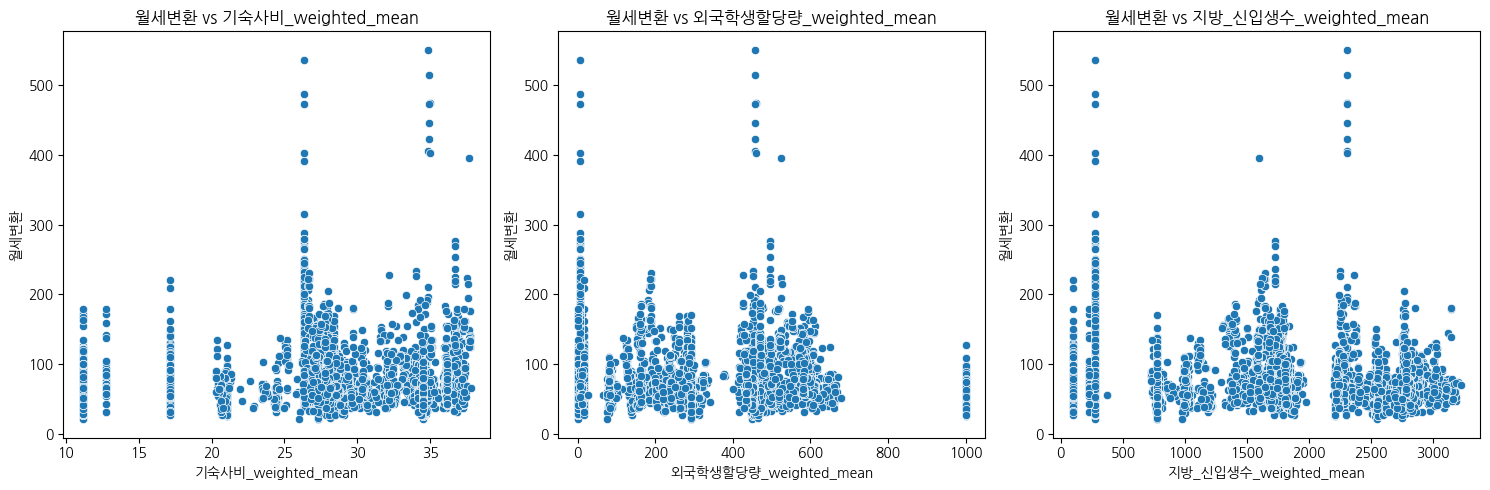

In [9]:
# Selecting the specified variables for visualization with '월세변환'
variables_for_visualization = ['기숙사비_weighted_mean', '외국학생할당량_weighted_mean', '지방_신입생수_weighted_mean']

plt.figure(figsize=(15, 5))
for i, variable in enumerate(variables_for_visualization):
    plt.subplot(1, len(variables_for_visualization), i + 1)
    sns.scatterplot(data=data, x=variable, y='월세변환')
    plt.title(f'월세변환 vs {variable}')
    plt.xlabel(variable)
    plt.ylabel('월세변환')
    plt.tight_layout()

plt.show()

In [10]:
plt.rcParams['font.family'] = 'NanumGothic'

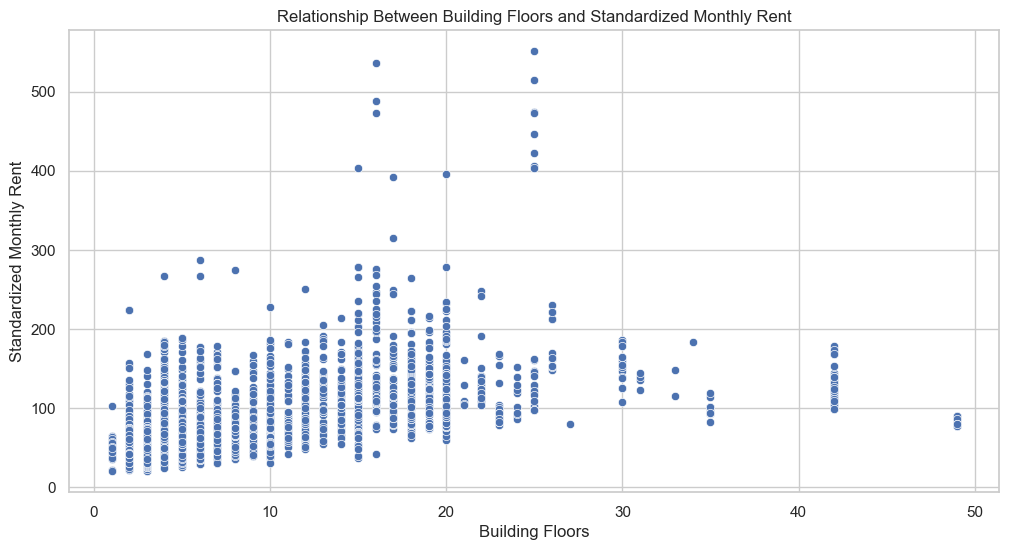

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['건물_층수'], y=data['월세변환'])

# Adding titles and labels
plt.title('Relationship Between Building Floors and Standardized Monthly Rent')
plt.xlabel('Building Floors')
plt.ylabel('Standardized Monthly Rent')
plt.show()

In [12]:
import numpy as np

# Applying log transformation to '월세변환' to achieve normality
data['월세변환_log'] = np.log(data['월세변환'])

# Displaying the first few rows of the updated dataset
data[['월세변환', '월세변환_log']].head()

,월세변환,월세변환_log
0,33.458333,3.510301
1,33.458333,3.510301
2,25.458333,3.237043
3,54.166667,3.992066
4,30.458333,3.416360


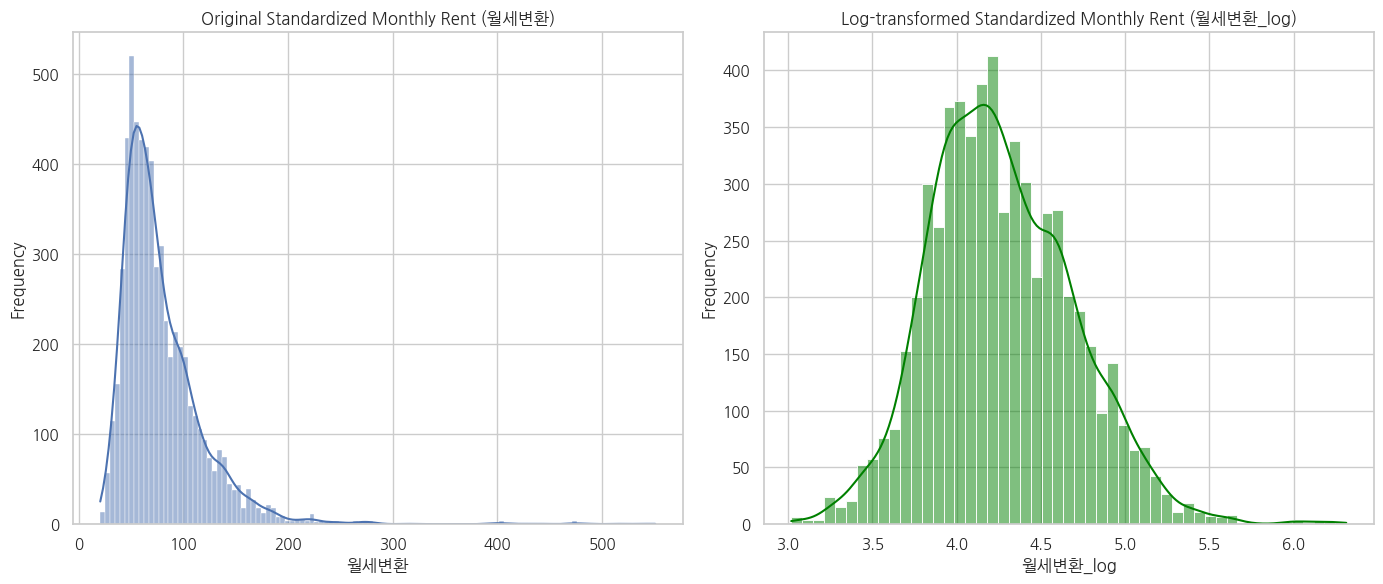

In [13]:
plt.rcParams['font.family'] = 'NanumGothic'

# Visualizing the original and log-transformed '월세변환' distributions
plt.figure(figsize=(14, 6))

# Original '월세변환'
plt.subplot(1, 2, 1)
sns.histplot(data['월세변환'], kde=True)
plt.title('Original Standardized Monthly Rent (월세변환)')
plt.xlabel('월세변환')
plt.ylabel('Frequency')

# Log-transformed '월세변환_log'
plt.subplot(1, 2, 2)
sns.histplot(data['월세변환_log'], kde=True, color='green')
plt.title('Log-transformed Standardized Monthly Rent (월세변환_log)')
plt.xlabel('월세변환_log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


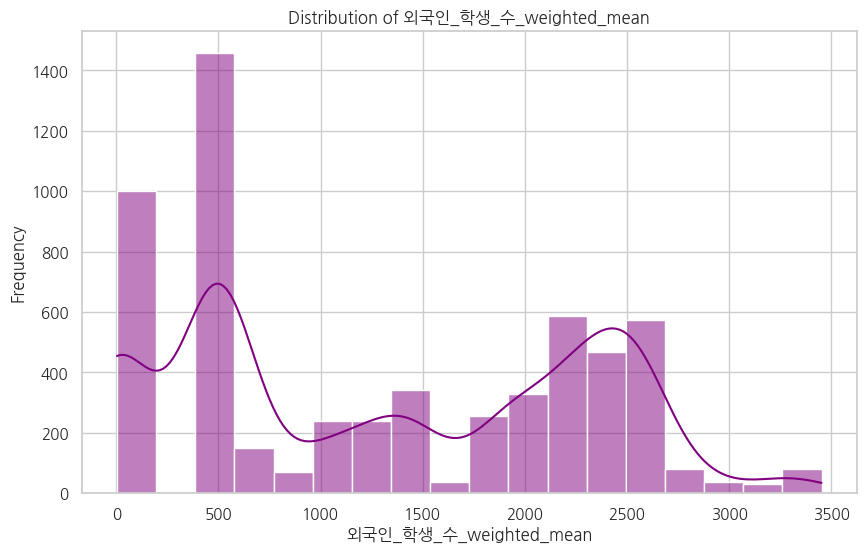

In [14]:
# '외국인_학생_수_weighted_mean' 변수에 대한 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data['외국인_학생_수_weighted_mean'], kde=True, color='purple')

# 제목 및 레이블 추가
plt.title('Distribution of 외국인_학생_수_weighted_mean')
plt.xlabel('외국인_학생_수_weighted_mean')
plt.ylabel('Frequency')
plt.show()

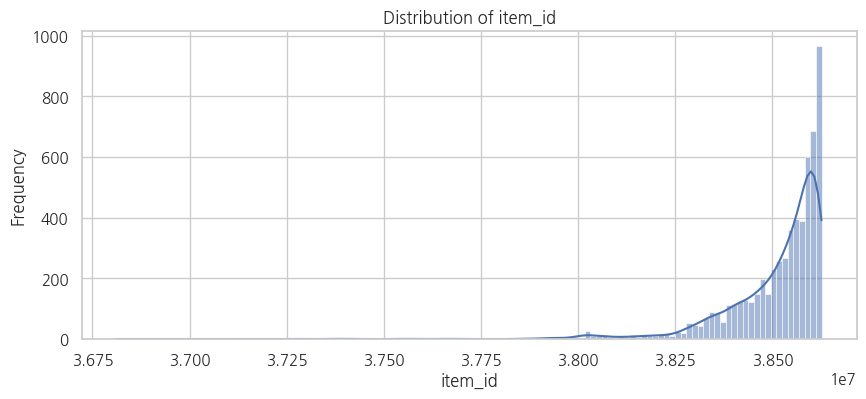

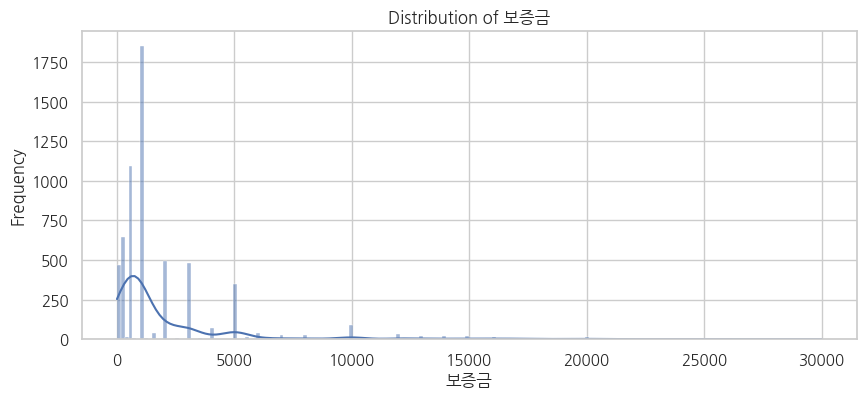

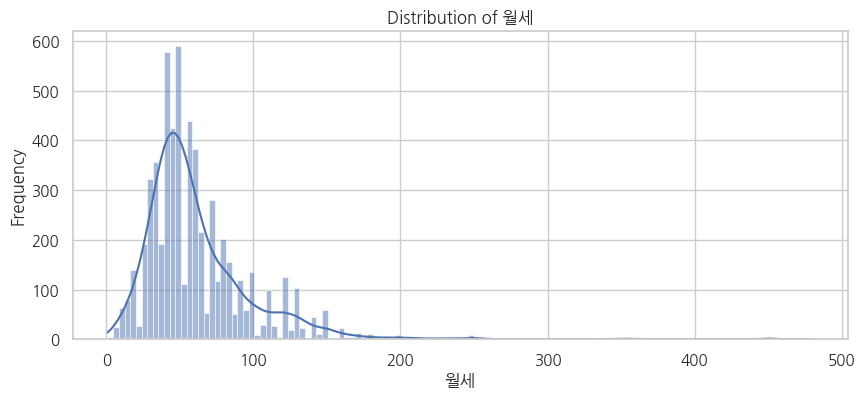

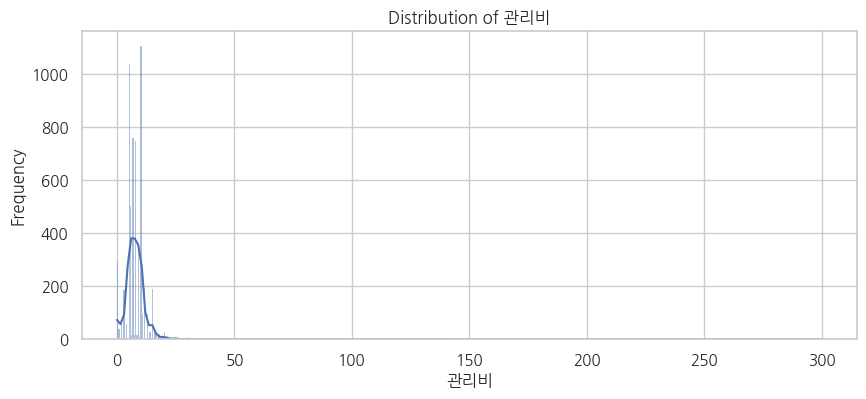

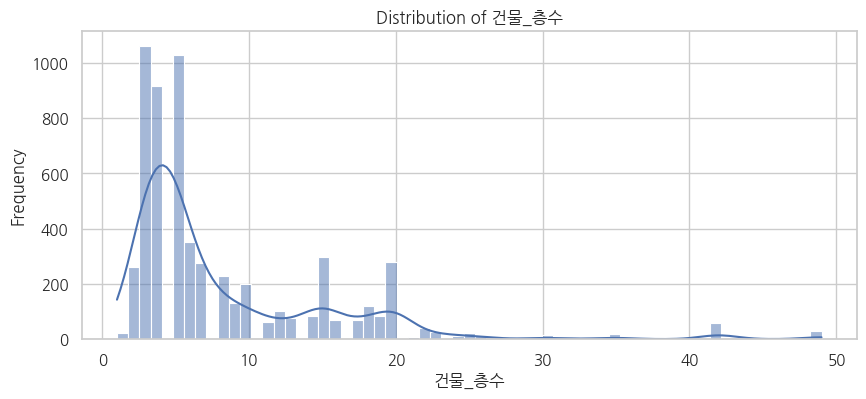

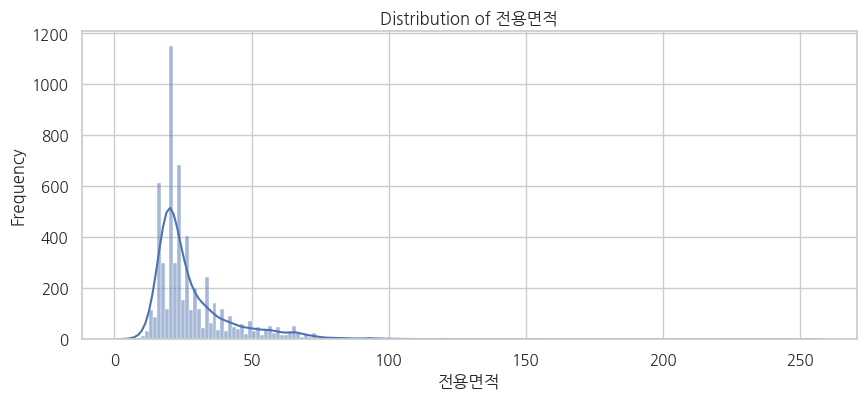

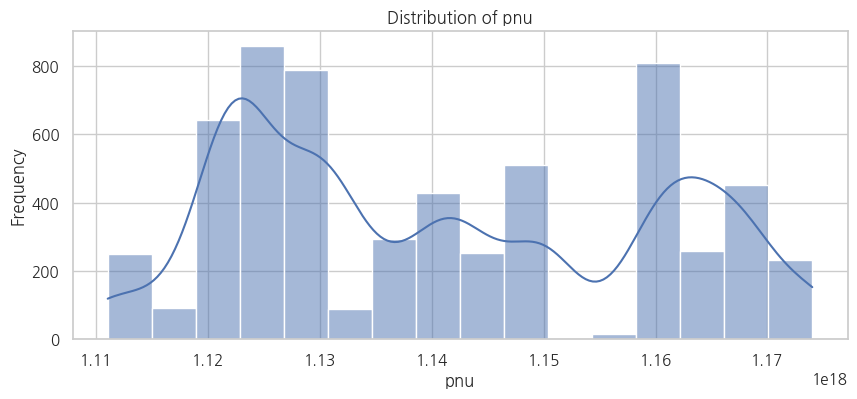

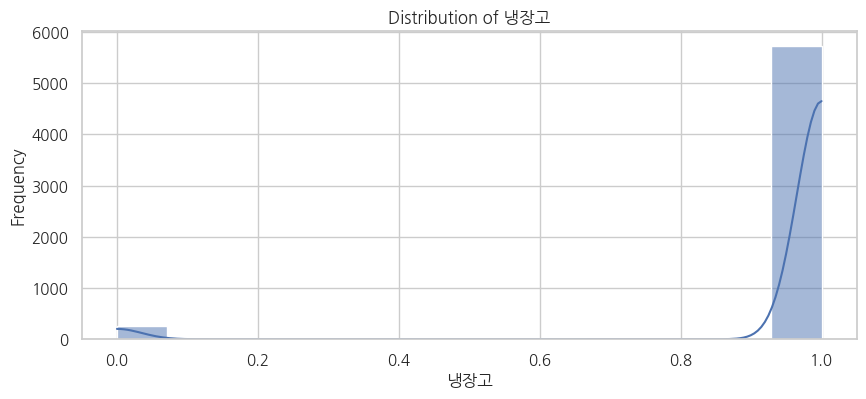

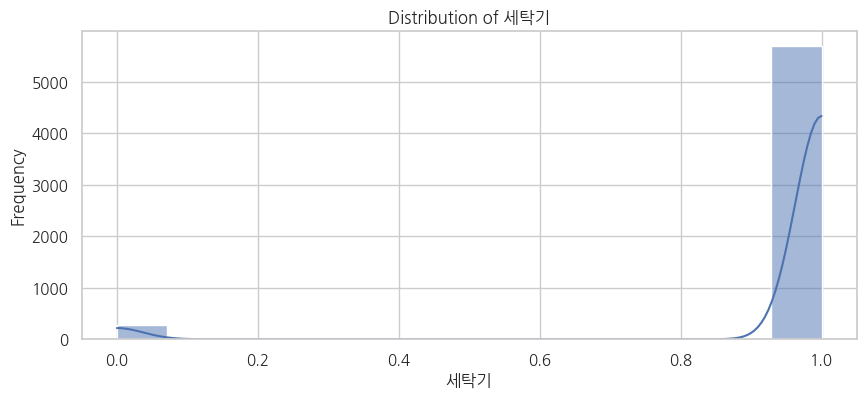

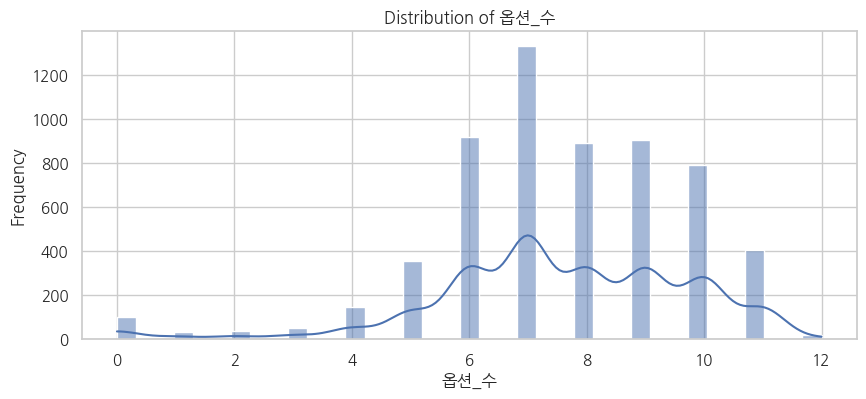

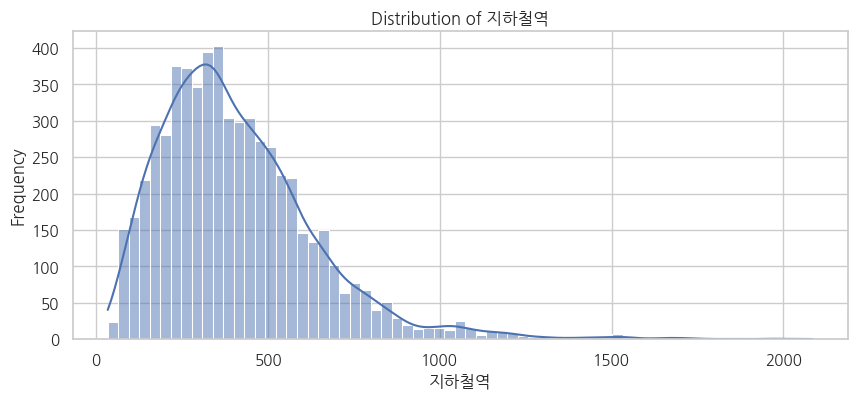

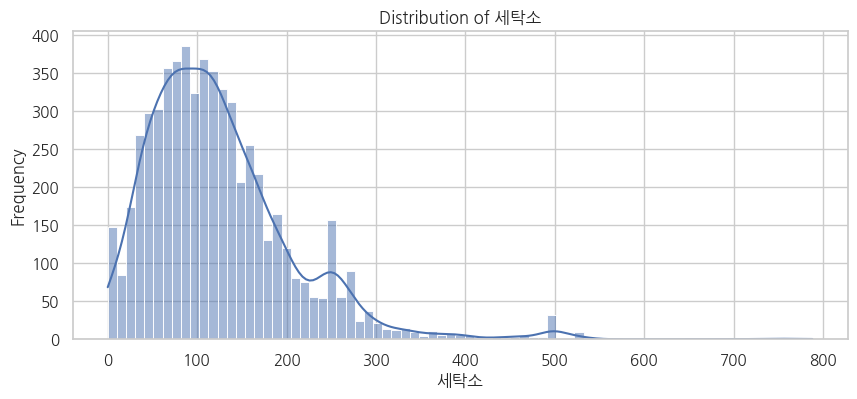

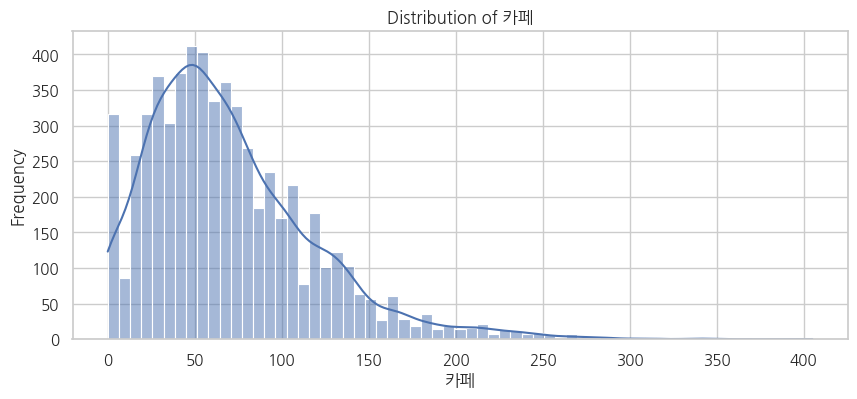

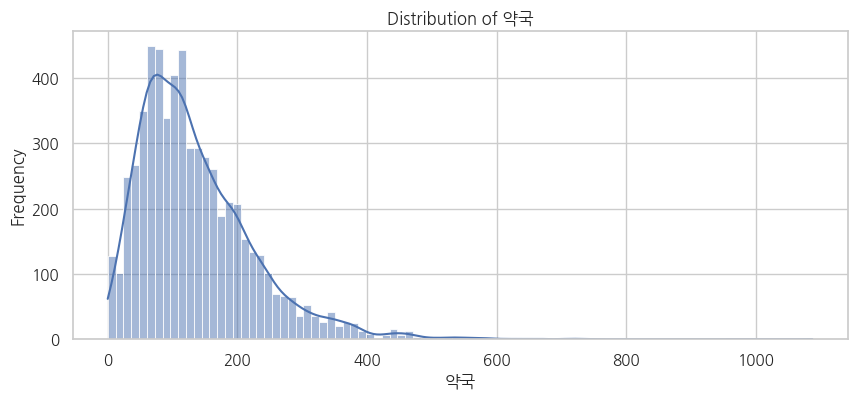

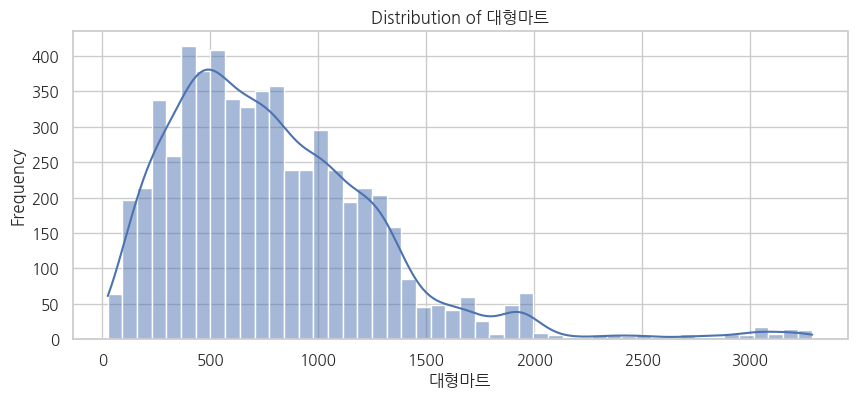

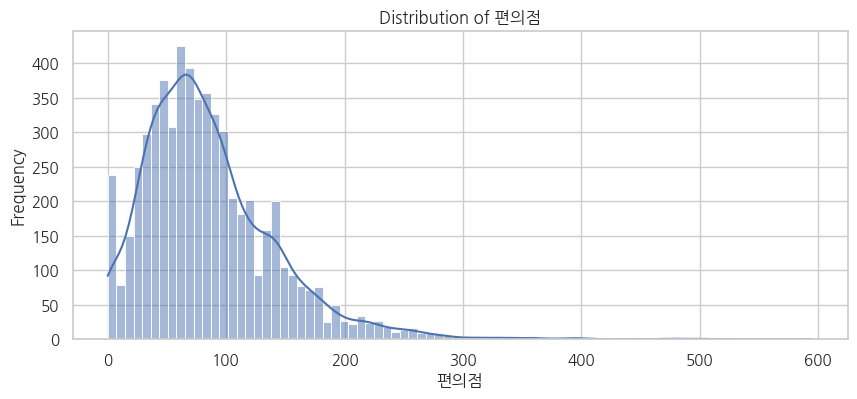

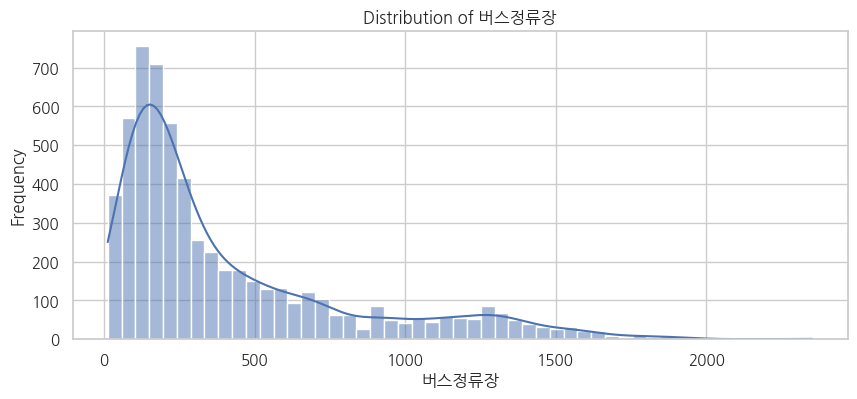

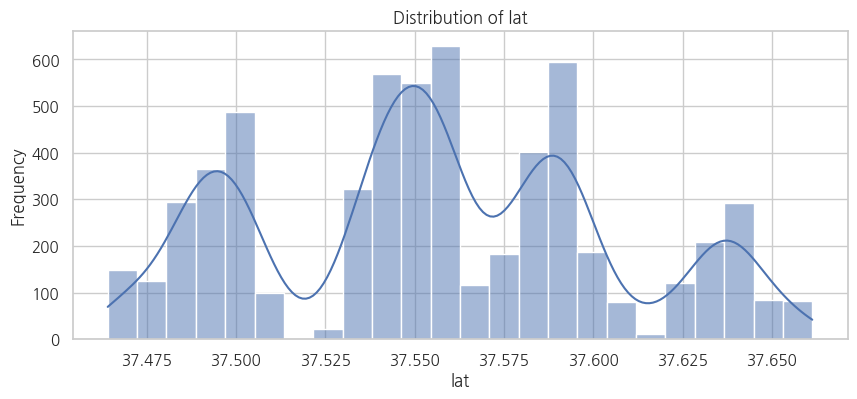

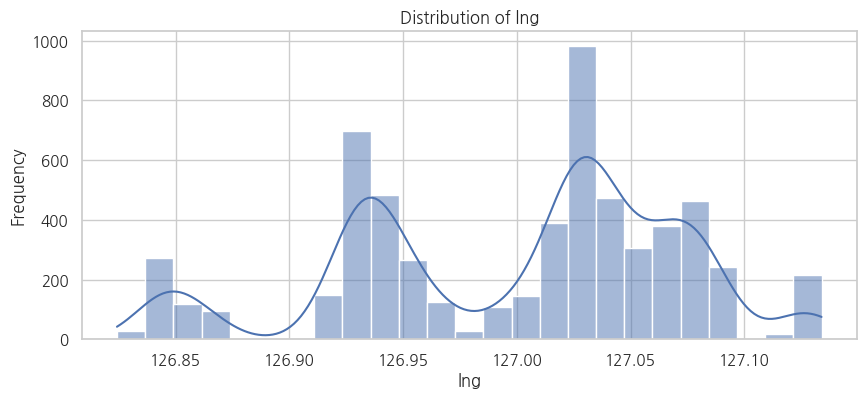

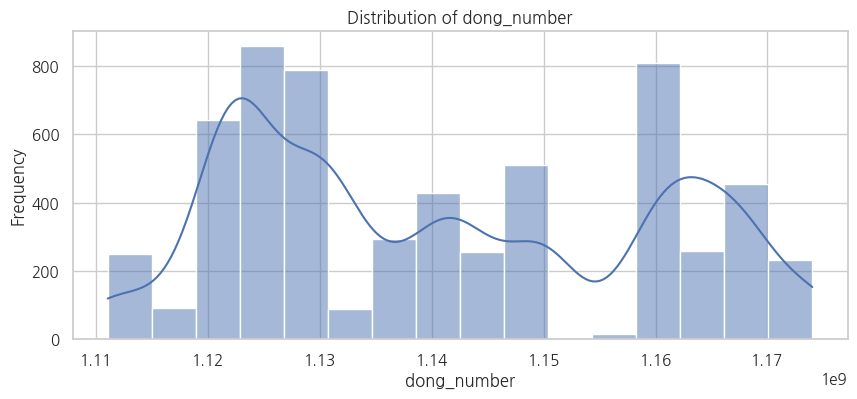

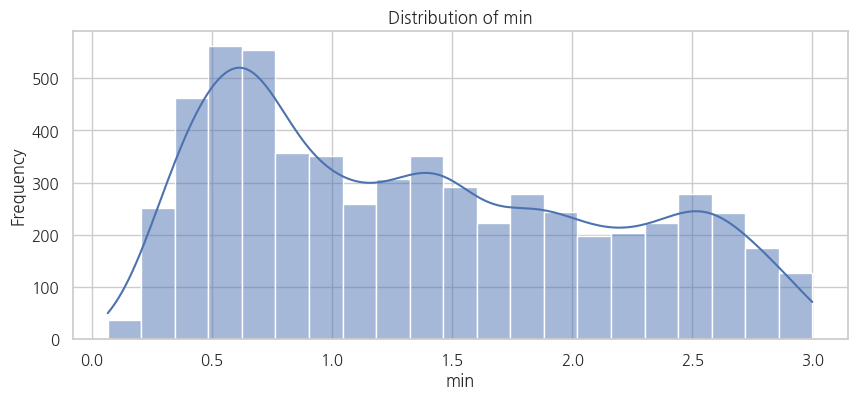

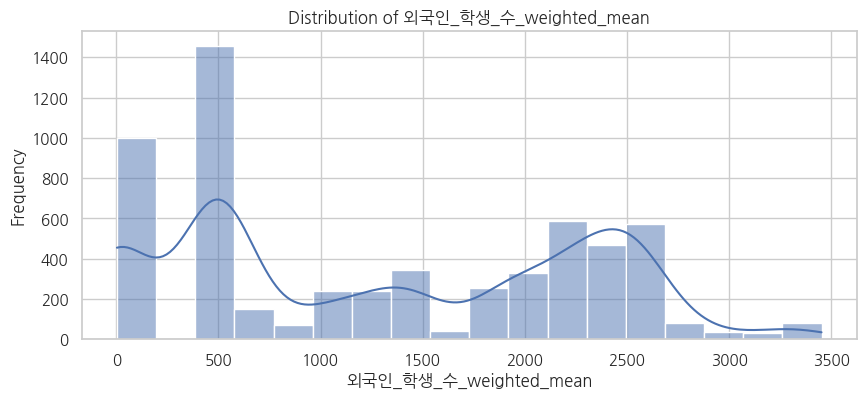

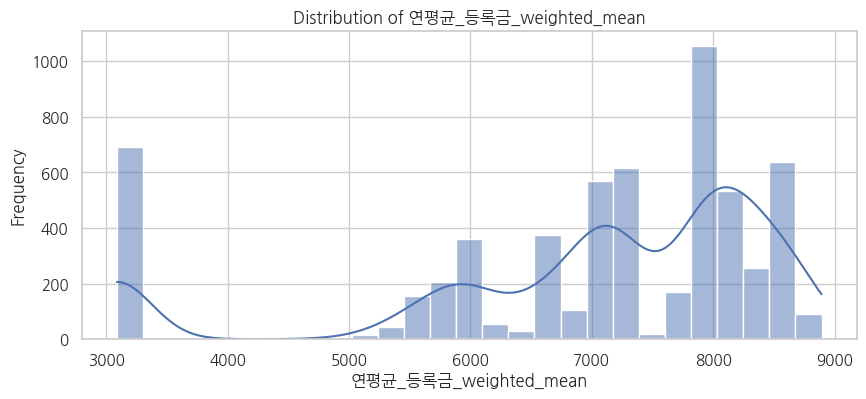

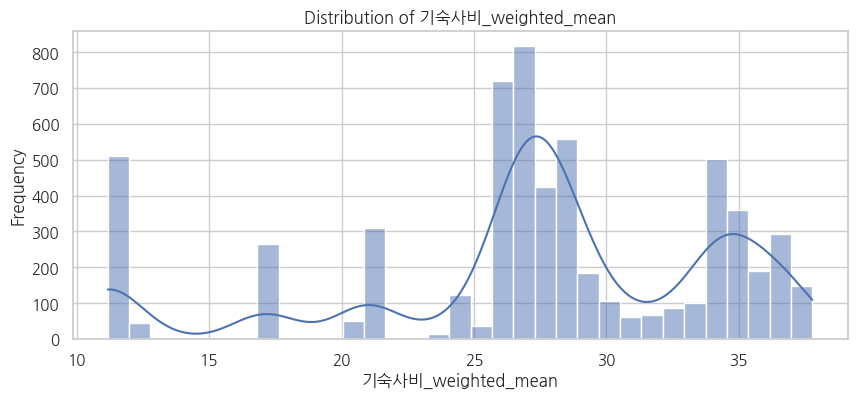

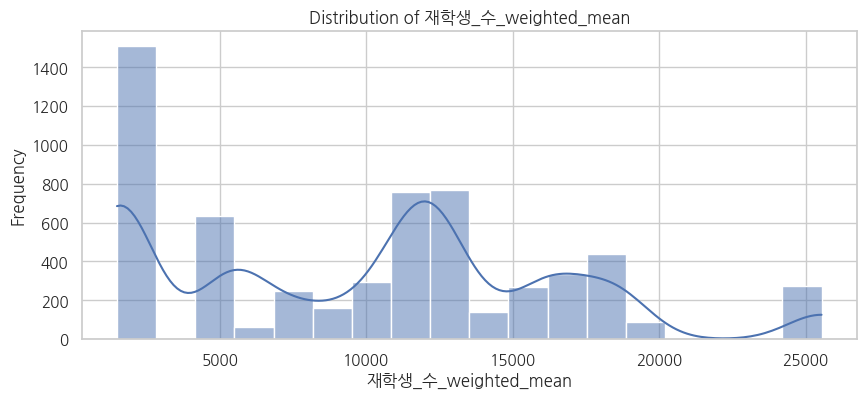

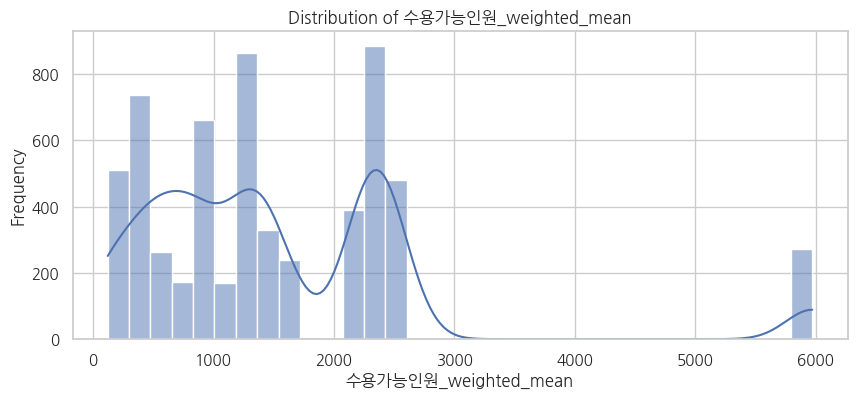

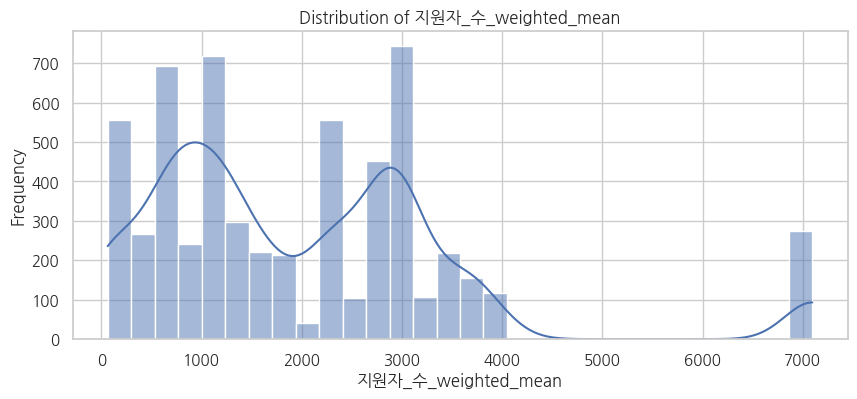

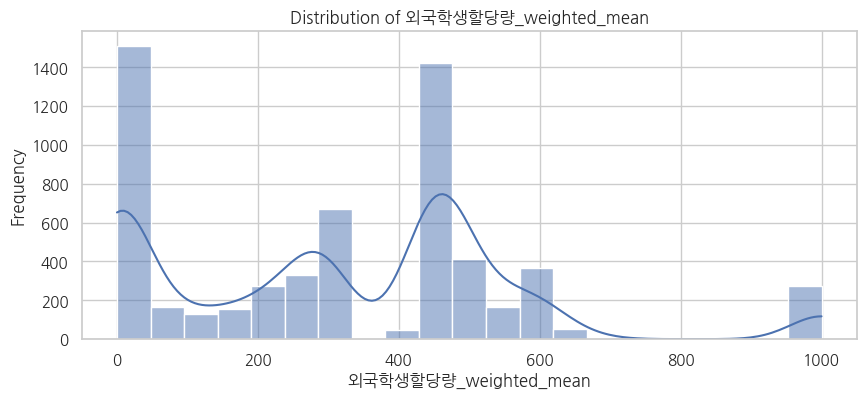

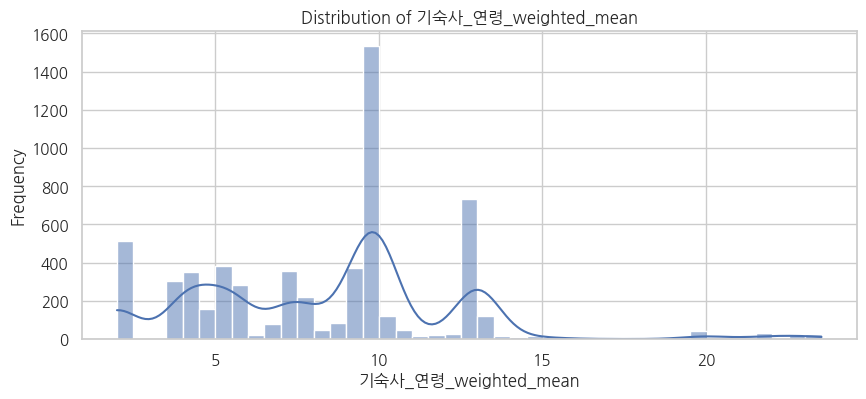

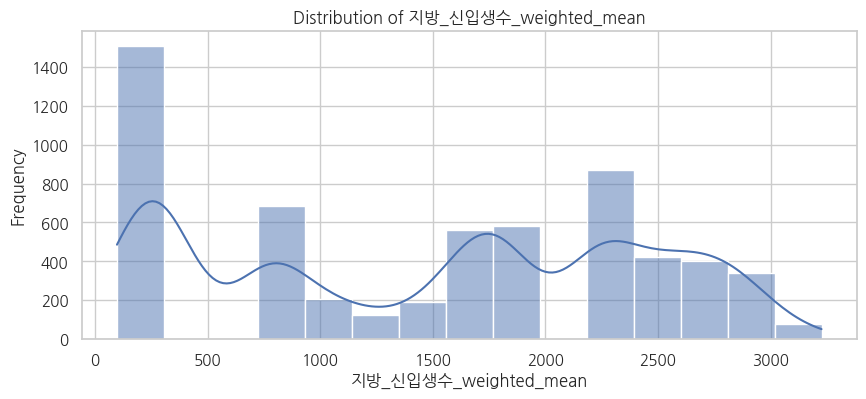

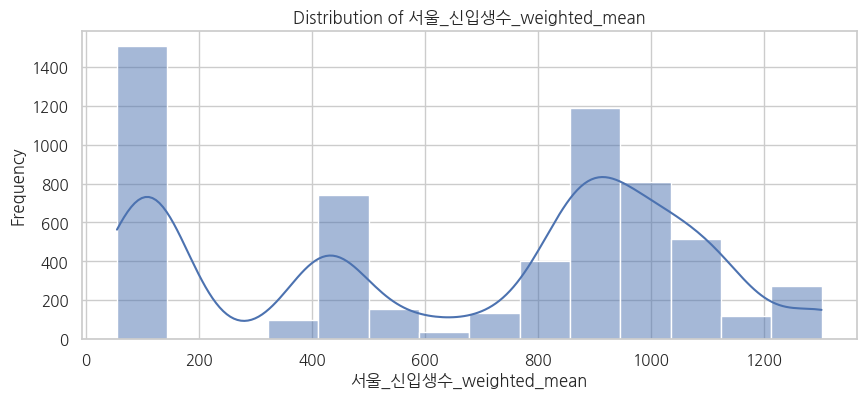

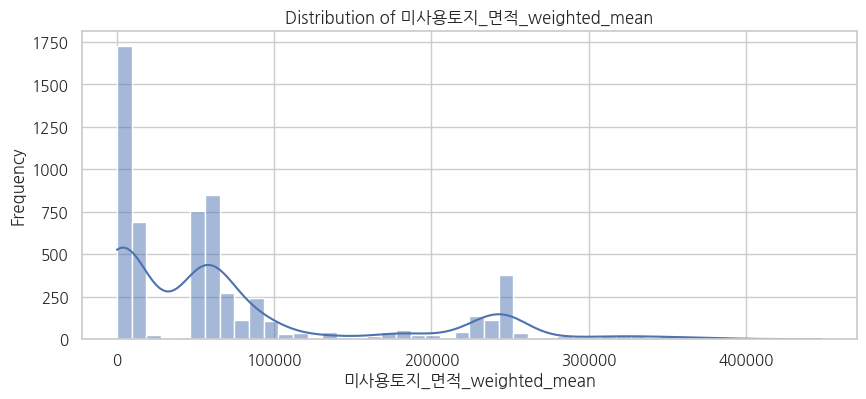

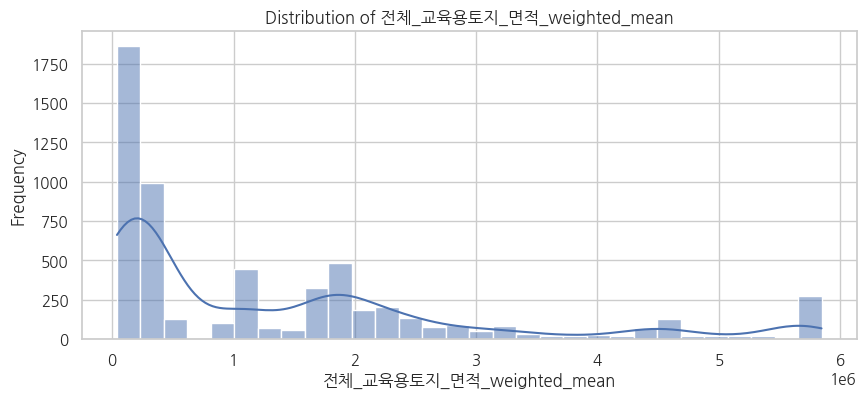

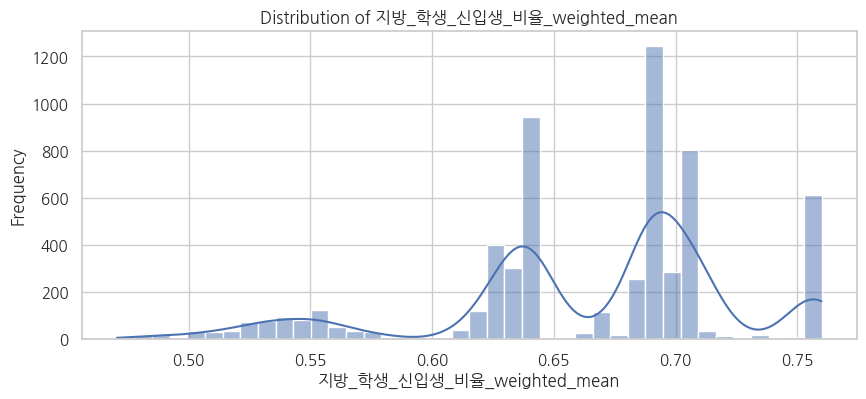

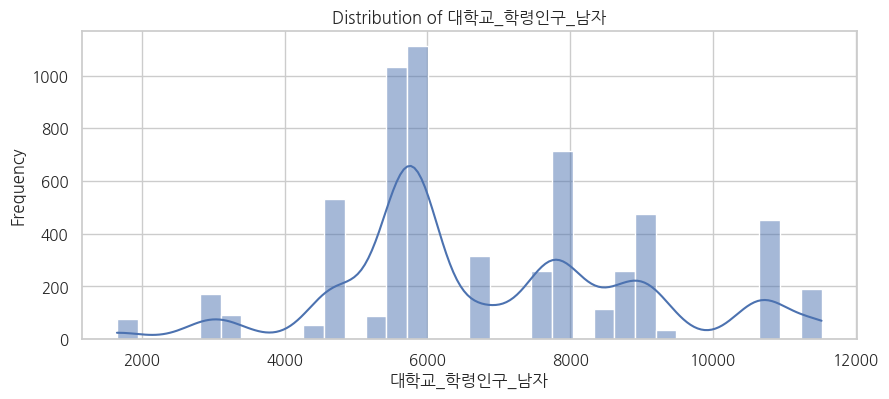

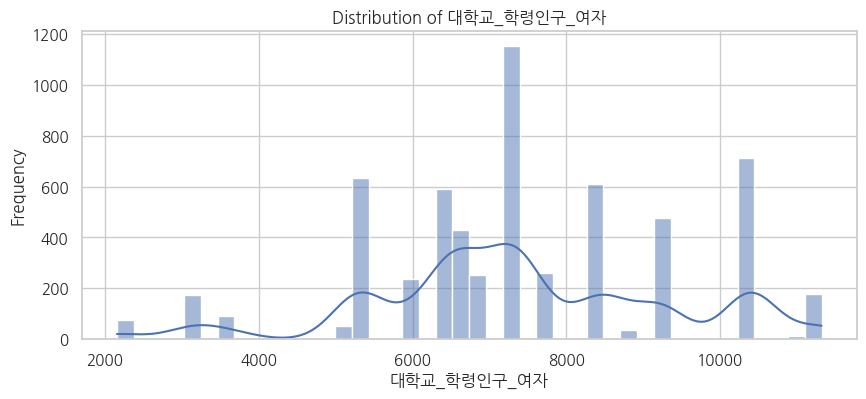

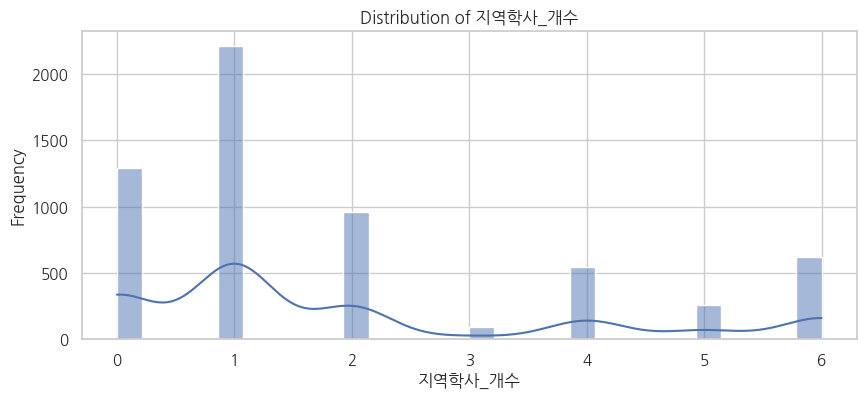

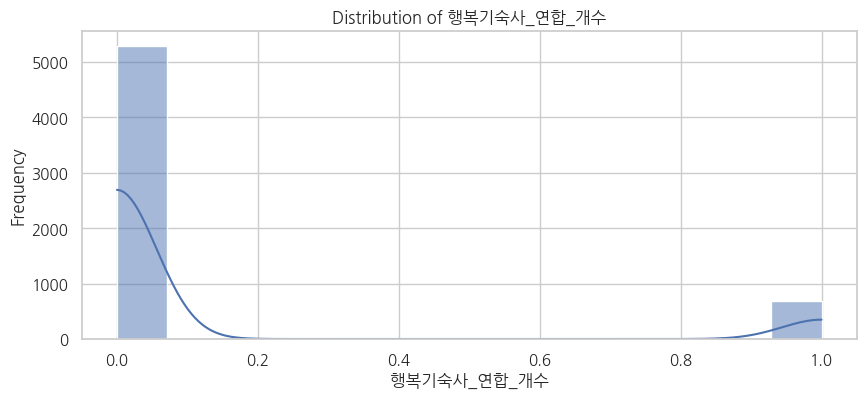

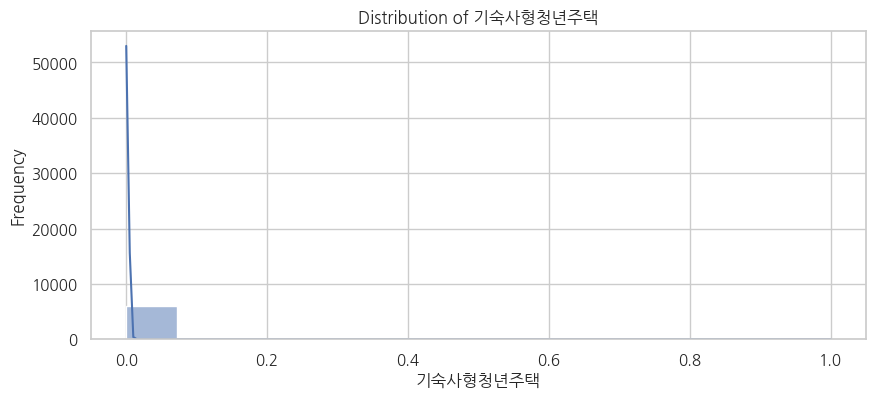

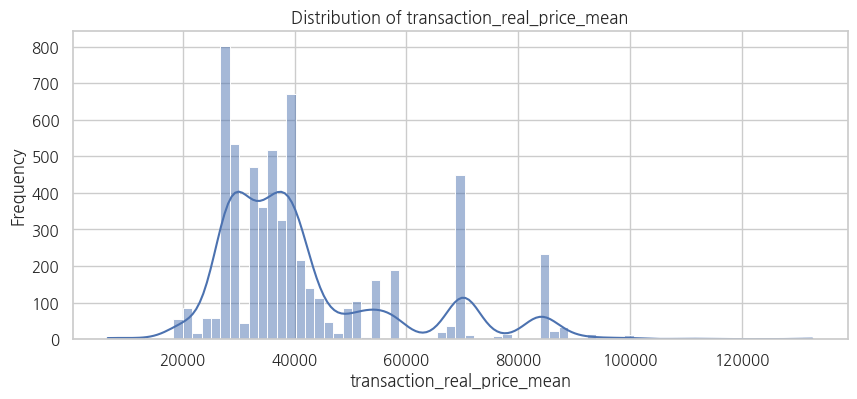

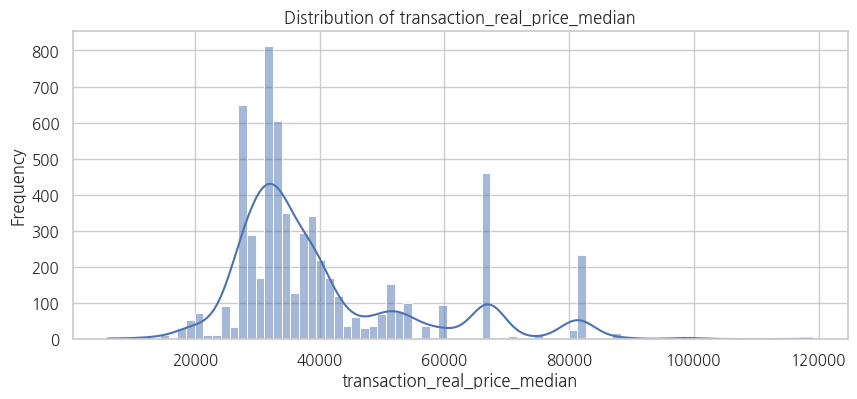

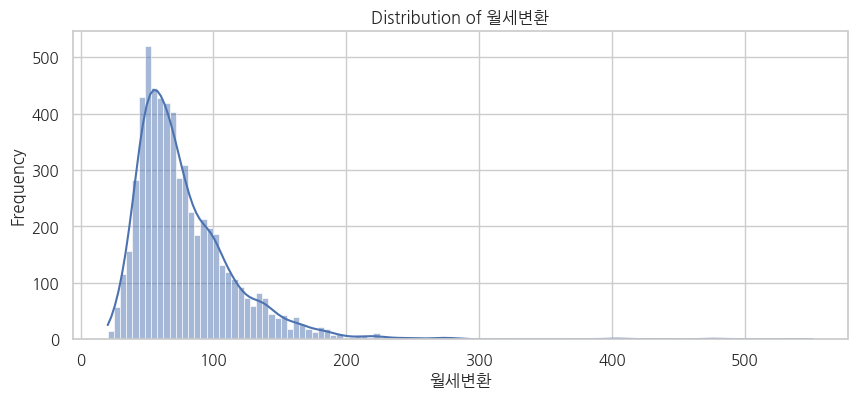

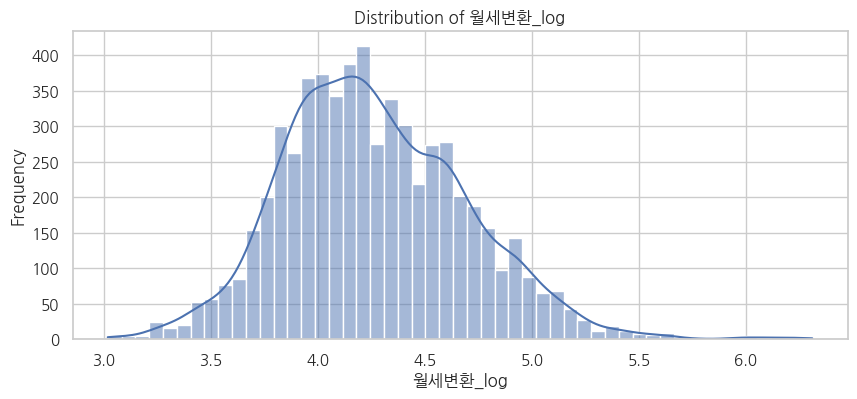

In [15]:
# 데이터셋의 모든 수치형 변수에 대해 히스토그램 생성
num_cols = data.select_dtypes(include=['float64', 'int64']).columns  # 수치형 변수 선택

# 각 수치형 변수에 대한 히스토그램 생성
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
# Extract '시' and '구' from the 주소 column
data['지역'] = data['주소'].str.extract(r'(\S+시 \S+구)')

# Group by the extracted 지역 and calculate the mean for 월세, 보증금, 전세금
grouped_data = data.groupby('지역')[['월세', '보증금', '월세변환']].mean().reset_index()

grouped_data.head()


,지역,월세,보증금,월세변환
0,서울시 강남구,96.737307,1923.598234,115.250267
1,서울시 강동구,57.132420,4238.780822,83.794869
2,서울시 강북구,51.669811,1278.528302,64.335959
3,서울시 강서구,46.235789,2016.823158,62.827562
4,서울시 관악구,40.235887,835.705645,53.821648


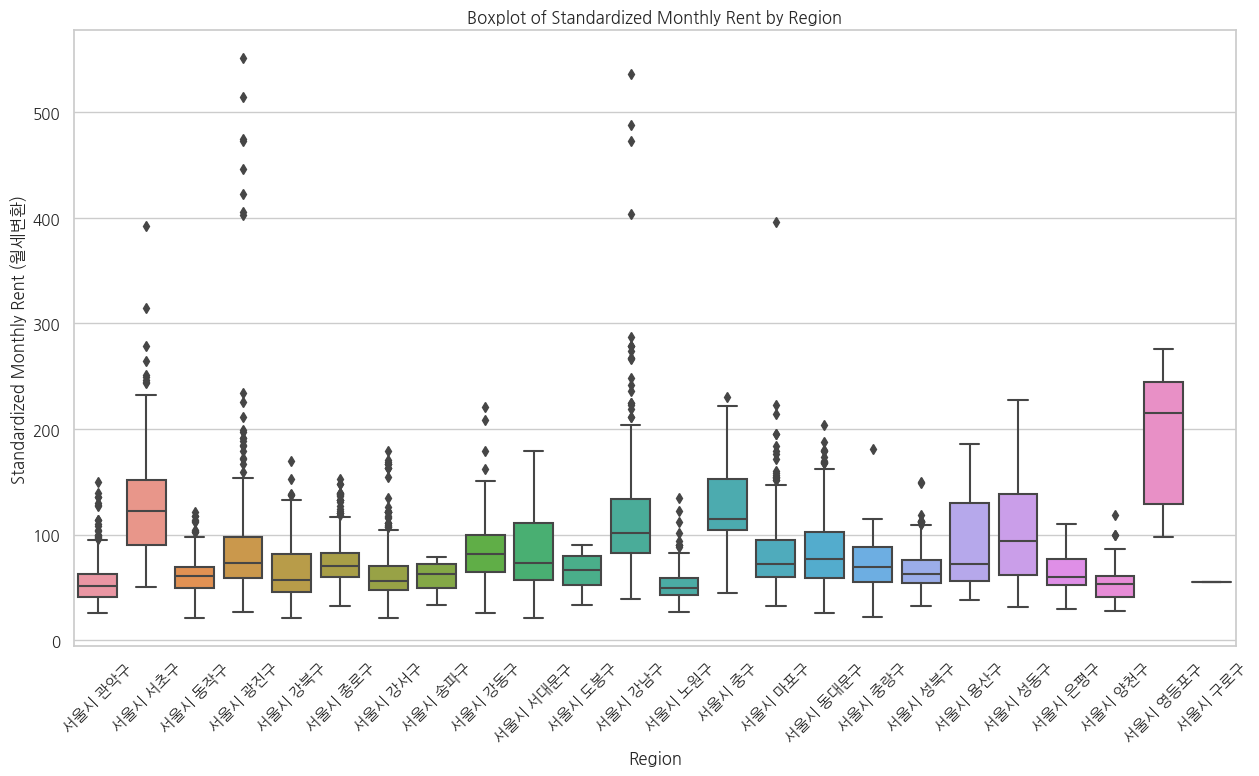

In [25]:
# '주소' 컬럼에서 '시'와 '구' 추출하여 '지역' 컬럼 생성
data['지역'] = data['주소'].str.extract(r'(\S+시 \S+구)')

# 지역별 '월세변환' 분포에 대한 박스플롯 생성
plt.figure(figsize=(15, 8))
sns.boxplot(x='지역', y='월세변환', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of Standardized Monthly Rent by Region')
plt.xlabel('Region')
plt.ylabel('Standardized Monthly Rent (월세변환)')
plt.show()